#  Training ANN and CNN on CIFAR100 dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:


(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()
print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


In [3]:
cifar100_train_images = cifar100_train_images.astype("float32") / 255.0
cifar100_test_images = cifar100_test_images.astype("float32") / 255.0


In [4]:
from tensorflow.keras.utils import to_categorical

cifar100_train_labels_cat = to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_cat = to_categorical(cifar100_test_labels, num_classes=100)
print(cifar100_train_labels_cat.shape)
print(len(cifar100_train_labels_cat))
print(cifar100_test_labels_cat.shape)

(50000, 100)
50000
(10000, 100)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout



In [9]:
cifar100_labels = [
 'apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle',
 'bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel',
 'can','castle','caterpillar','cattle','chair','chimpanzee','clock',
 'cloud','cockroach','couch','crab','crocodile','cup','dinosaur',
 'dolphin','elephant','flatfish','forest','fox','girl','hamster',
 'house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion',
 'lizard','lobster','man','maple_tree','motorcycle','mountain','mouse',
 'mushroom','oak_tree','orange','orchid','otter','palm_tree','pear',
 'pickup_truck','pine_tree','plain','plate','poppy','porcupine',
 'possum','rabbit','raccoon','ray','road','rocket','rose','sea',
 'seal','shark','shrew','skunk','skyscraper','snail','snake','spider',
 'squirrel','streetcar','sunflower','sweet_pepper','table','tank',
 'telephone','television','tiger','tractor','train','trout','tulip',
 'turtle','wardrobe','whale','willow_tree','wolf','woman','worm'
]


In [7]:
ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation="relu"),
    Dropout(0.5),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(100, activation="softmax")
])

ann_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history_ann = ann_model.fit(
    cifar100_train_images,
    cifar100_train_labels_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=1
)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.0628 - loss: 4.0902 - val_accuracy: 0.0922 - val_loss: 4.0456
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.0646 - loss: 4.0750 - val_accuracy: 0.0942 - val_loss: 4.0562
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.0631 - loss: 4.0821 - val_accuracy: 0.0847 - val_loss: 4.0694
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.0643 - loss: 4.0739 - val_accuracy: 0.0981 - val_loss: 4.0632
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.0677 - loss: 4.0666 - val_accuracy: 0.0863 - val_loss: 4.0758
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.0678 - loss: 4.0539 - val_accuracy: 0.0877 - val_loss: 4.0633
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.0685 - loss: 4.0444 - val_accuracy: 0.0831 - val_loss: 4.1038
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.0680 - loss: 4.0573 - 

In [ ]:
ann_predictions = ann_model.predict(cifar100_test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:

pred_classes = np.argmax(ann_predictions[:10], axis=1)
true_classes = cifar100_test_labels[:10].flatten()


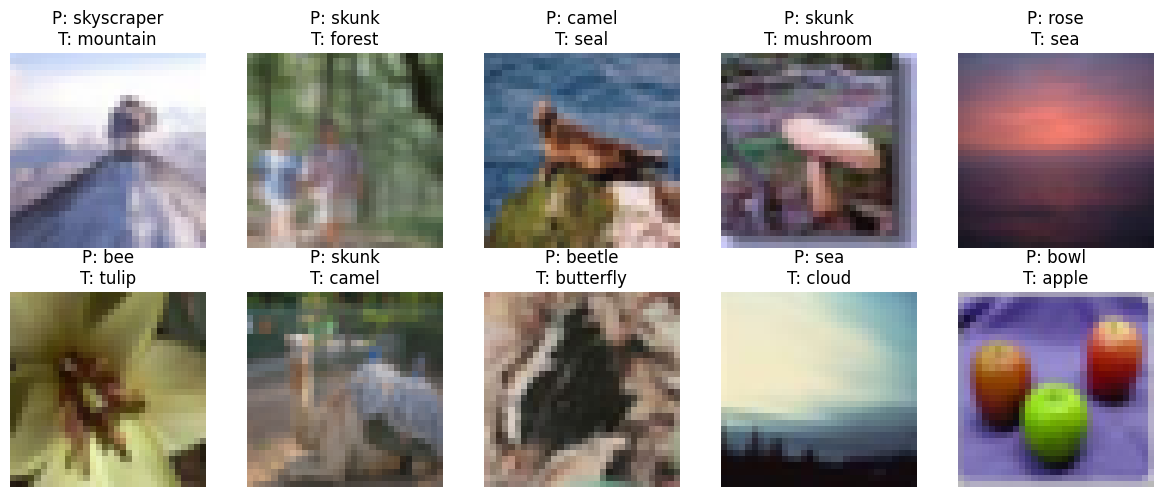

In [ ]:
plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cifar100_test_images[i])
    plt.title(
        f"P: {cifar100_labels[pred_classes[i]]}\n"
        f"T: {cifar100_labels[true_classes[i]]}"
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


# CNN MODEL


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn_model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(),

    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

cnn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [8]:
model_checkpoint_basic_cnn = ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

basic_cnn_history = cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_cat,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)

Epoch 1/30
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0819 - loss: 4.1070
Epoch 1: val_loss improved from inf to 3.26453, saving model to best_basic_cnn_model_weights.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.0827 - loss: 4.1017 - val_accuracy: 0.2203 - val_loss: 3.2645
Epoch 2/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2544 - loss: 3.0717
Epoch 2: val_loss improved from 3.26453 to 2.98827, saving model to best_basic_cnn_model_weights.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2545 - loss: 3.0709 - val_accuracy: 0.2697 - val_loss: 2.9883
Epoch 3/30
613/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3326 - loss: 2.6742
Epoch 3: val_loss improved from 2.98827 to 2.72413, saving model to best_basic_cnn_model_weights.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3327 - loss: 2.6738 - val_accuracy: 0.3247 - val_loss: 2.7241
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3941 

In [10]:
import numpy as np

pred_probs = cnn_model.predict(cifar100_test_images, verbose=0)
pred_labels = np.argmax(pred_probs, axis=1)


In [12]:
import matplotlib.pyplot as plt

def show_predictions(images, true_labels, pred_labels, pred_probs, n=12):
    idxs = np.random.choice(len(images), n, replace=False)

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(idxs):
        plt.subplot(2, n//2, i + 1)
        plt.imshow(images[idx])
        plt.axis("off")

        true_name = cifar100_labels[true_labels[idx]]
        pred_name = cifar100_labels[pred_labels[idx]]
        confidence = pred_probs[idx][pred_labels[idx]] * 100

        title_color = "green" if true_labels[idx] == pred_labels[idx] else "red"

        plt.title(
            f"T: {true_name}\nP: {pred_name}\n{confidence:.1f}%",
            fontsize=9,
            color=title_color
        )

    plt.tight_layout()
    plt.show()


In [14]:
true_labels = cifar100_test_labels.flatten()


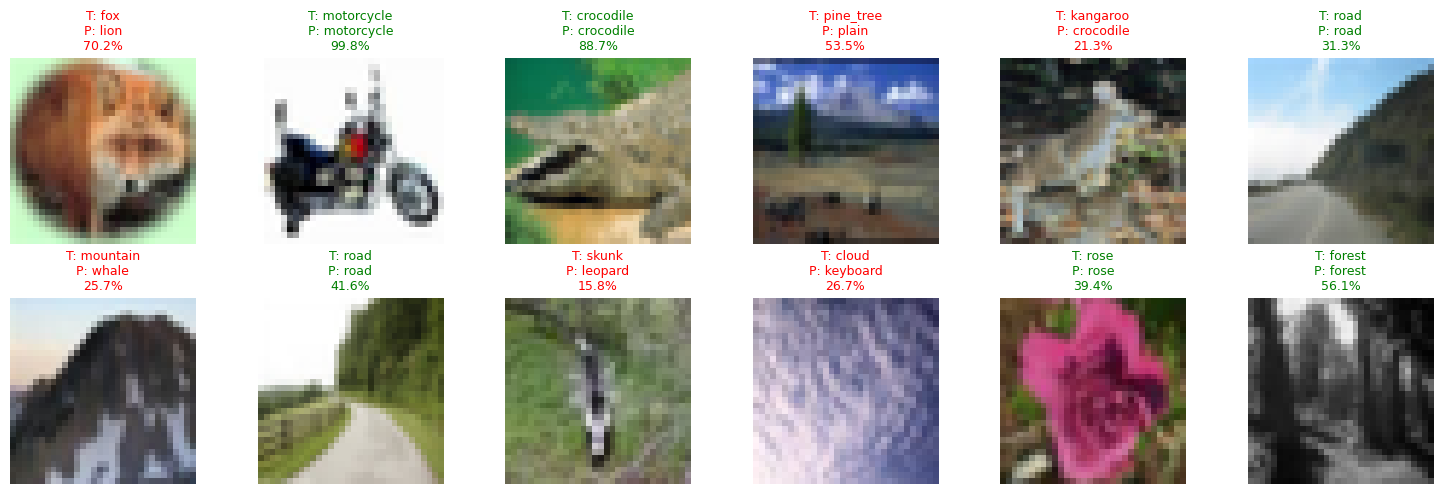

In [15]:
show_predictions(
    cifar100_test_images,
    true_labels,
    pred_labels,
    pred_probs,
    n=12
)
